In [1]:
import cagp
import numpy as np
import matplotlib.pyplot as plt

from icecream import ic

Define a equally spaced 1D train set and randomly sampled test sets with dimensions n_train and n_test

In [2]:
n_train = 100
n_test = 200

Xtrain = np.linspace(0,1,n_train)[:,None]
Xtest = np.sort(np.random.uniform(0,1,n_test)[:,None],0)



In-model setup: sample noisy ytrain and ytest (for reference). We use Matern kernel function built in the cagp.

In [3]:
np.random.seed(10)

#kernel lengthscale
l = 0.2
#kernel amplitude
sigma2 = 0.1
#observation noise
sig_ker = 1e-1

Ctrtr = cagp.matker32(Xtrain, Xtrain)
Ctrts = cagp.matker32(Xtest, Xtrain)
Ctsts = cagp.matker32(Xtest, Xtest)

augmented_cov = np.block([[Ctrtr, Ctrts],[Ctrts.T, Ctsts]])
augmented_mu = np.zeros(n_train+n_test)
y_augmented = np.random.multivariate_normal(augmented_mu, augmented_cov)
ytrain_true = y_augmented[0:n_train]
ytrain = ytrain_true + np.random.normal(0, sigma2, n_train)
ytest = y_augmented[n_train:]

Now compute the CAGP-CG and CAGP-GS posterior for a small $m$ number of iterations

In [4]:
m_0tr = np.zeros(n_train)
m_0ts = np.zeros(n_test)
m = 10
GPClass = cagp.cagp()
mgs, kgs = GPClass.CAGP_Post(Xtrain, ytrain,  Xtest, l, sigma2, sig_ker2 = 1,  m = m, ytest = ytest, PLS = 'GS')
mcg, kcg = GPClass.CAGP_Post(Xtrain, ytrain,  Xtest, l, sigma2, sig_ker2 = 1,  m = m, ytest = ytest, PLS = 'CG')


Plot the posterior mean and covariance

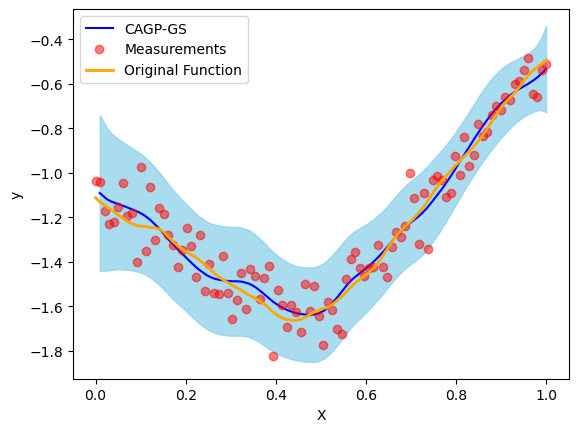

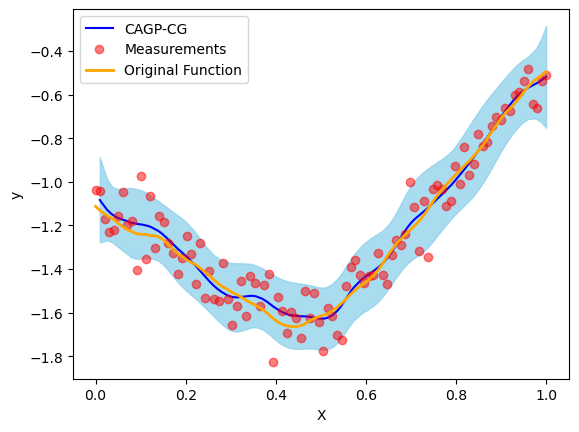

In [5]:

kdiag = np.sqrt(np.diag(kgs))
plt.plot(Xtest, mgs, c = 'blue',label='CAGP-GS')
plt.fill_between(Xtest[:,0], mgs + kdiag, mgs - kdiag, color = 'skyblue', alpha = 0.7)
plt.plot(Xtrain, ytrain, 'ro' ,alpha = 0.5, linewidth=0.5, label = 'Measurements')
plt.plot(Xtrain, ytrain_true, c = 'orange' ,linewidth = 2, label='Original Function')
plt.ylabel('y')
plt.xlabel('X')
plt.legend()
plt.show()

kdiagcg = np.sqrt(np.diag(kcg))
plt.plot(Xtest, mcg, c = 'blue',label='CAGP-CG')
plt.fill_between(Xtest[:,0], mcg + kdiagcg, mcg - kdiagcg, color = 'skyblue', alpha = 0.7)
plt.plot(Xtrain, ytrain, 'ro' ,alpha = 0.5, linewidth=0.5, label = 'Measurements')
plt.plot(Xtrain, ytrain_true, c = 'orange' ,linewidth = 2, label='Original Function')
plt.ylabel('y')
plt.xlabel('X')
plt.legend()
plt.show()


CAGP-GS shows a better calibrated posterior than CAGP-CG. 